#Section 1 프로젝트
게임 회사의 데이터 팀에 합류하여 다음 분기에 어떤 게임을 설계하여야 할지 해결해야 한다.

이를 위해 기존 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 목표이다.

발표를 듣는 사람은 비데이터 직군. 즉 생각과 가정을 설명하는 과정에서 배경지식이 없는 사람도 이해할 수 있도록 해야 한다.

##참조
Section 1때 배운 내용.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, Cluster

##반드시 들어가야하는 내용
지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 해야 한다.

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 해야 한다.

출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 한다.

#파일 불러오기

In [ ]:
from google.colab import files
myfile = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd
df=pd.DataFrame(pd.read_csv('vgames2.csv', index_col=0))
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Name : 게임의 이름

Platform : 게임이 지원되는 플랫폼의 이름

Year : 게임이 출시된 연도

Genre : 게임의 장르

Publisher : 게임을 제작한 회사

NA_Sales : 북미지역에서의 출고량

EU_Sales : 유럽지역에서의 출고량

JP_Sales : 일본지역에서의 출고량

Other_Sales : 기타지역에서의 출고량

#결측치 확인 및 제거

In [ ]:
df.info()

#non-null이 다른 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df = df.dropna(axis=1)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


#1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [ ]:
#object임을 확인하고 데이터 내용 확인 =>M과 K가 섞여 있는 것을 확인할 수 있음.
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [ ]:
#문자열 M, K 들어간 경우 삭제
drop = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop))]

df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '0.14', '0.01',
       '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29', '0.19',
       '0.26', '0.11', '0.18', '0.3', '0.33', '0.51', '0.13', '0.34',
       '0.25', '0.41', '0.52', '0.22', '0.35', '0.1', '0.67', '0.59',
       '0.36', '0.21', '1.19', '5.91', '1.98', '0.09', '0.5', '0.94',
       '0.16', '0.63', '0.43', '0.2', '1.23', '0.44', '0.42', '0.97',
       '2.67', '0.28', '6.05', '0.47', '0.49', '0.62', '0.24', '0.72',
       '1.74', '0.46', '0.65', '0.32', '1.53', '0.23', '0.53', '0.37',
       '1.26', '0.39', '0.58', '1.94', '2.31', '1.03', '0.82', '0.4',
       '0.93', '0.56', '0.96', '1.64', '0.69', '1.25', '0.27', '0.92',
       '1.24', '0.73', '1.54', '1.02', '0.54', '0.15', '1.09', '3.44',
       '0.55', '2.29', '0.88', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.45', '1.2', '1.41', '0.68', '0.86',
       '1.56', '0.31', '1.45', '1.11', '2.9', '0.83', '0.78', '3.38',
       '0.64', '1.

In [ ]:
#타입 변환
df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] =df['Other_Sales'].astype(float)

In [ ]:
#장르와 지역으로 데이터 묶어서 통합

NA = df.groupby('Genre')['NA_Sales'].sum()
EU = df.groupby('Genre')['EU_Sales'].sum()
JP = df.groupby('Genre')['JP_Sales'].sum()
Other = df.groupby('Genre')['Other_Sales'].sum()

sales = pd.DataFrame()
sales = sales.append(NA)
sales = sales.append(EU)
sales = sales.append(JP)
sales = sales.append(Other)
sales = sales.T

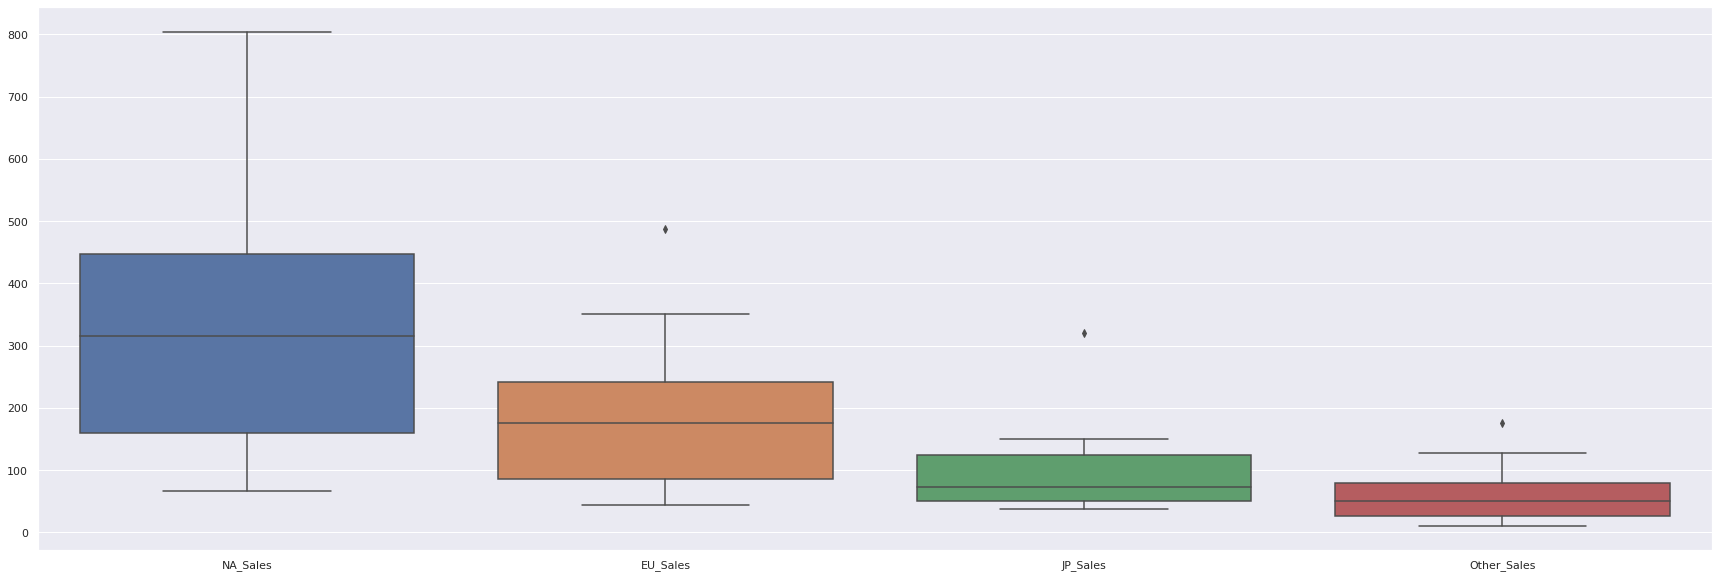

In [ ]:
#상자그림으로 4가지 지역 간의 차이가 있는지 확인
import seaborn as sns
plt.figure(figsize=(30,10))
sns.boxplot(data = sales);

In [ ]:
#아노바 분산분석으로 전체 그룹간의 평균값 차이가 통계적 의미가 있는지 판단
#귀무가설 : 지역에 따라서 선호하는 게임 장르가 다르지 않을 것이다.
#대립가설 : 지역에 따라서 선호하는 게임 장르가 다를 것이다.

from scipy import stats
statistic, pvalue = stats.f_oneway(NA, EU, JP, Other)
print(pvalue)

if pvalue <0.05:
    print("대립가설 채택하여 지역에 따라 선호하는 게임 장르가 다를 것이다.")
else:
    print("귀무가설 채택하여 지역에 따라 선호하는 게임 장르가 다르지 않을 것이다.")

# 분산분석은 정확히 어느 그룹의 평균값이 의미 있는지 알려주지 않아 사후분석이 진행되어야 하지만 본 과제에서는 차이가 있는지만 판단하고자 분산분석을 진행하는 것이기 때문에 사후분석은 진행하지 않는다.

8.154393198719703e-05
대립가설 채택하여 지역에 따라 선호하는 게임 장르가 다를 것이다.


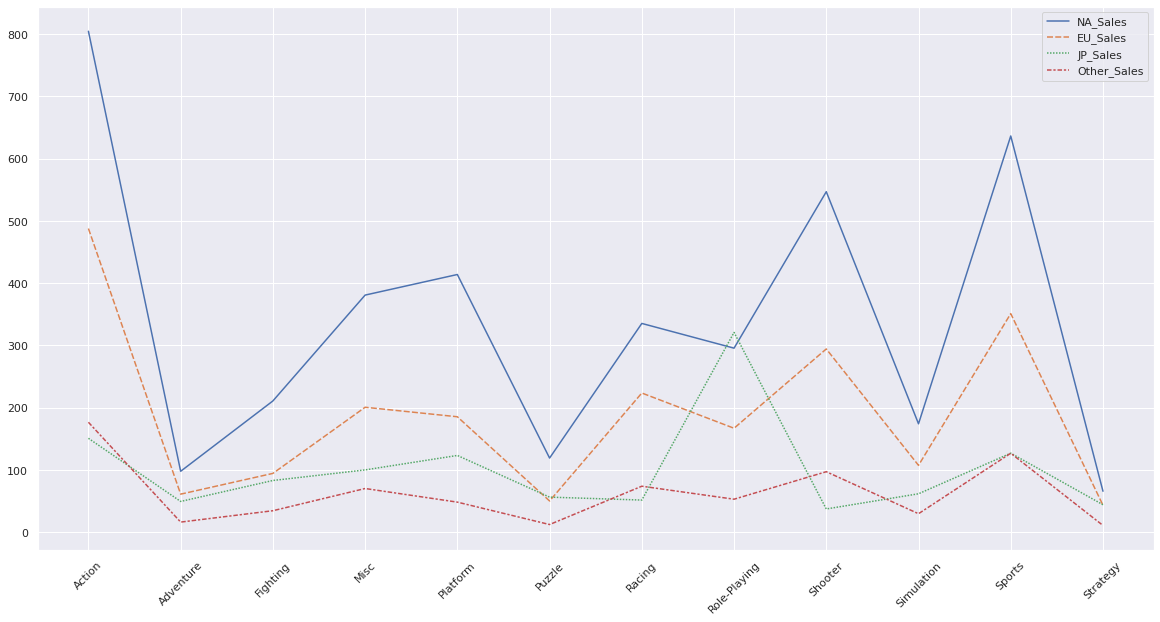

<Figure size 2160x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.lineplot(data = sales)
plt.figure(figsize=(30,10));

#시각화를 통하여 북미지역과 유럽지역, 기타 지역에서는 1등 Action, 2등 sports, 3등 shooter
#하지만 일본지역에서는 1등 role-playing으로 나온 것을 확인할 수 있다.

#2. 연도별 게임의 트렌드가 있을까?
-장르별

In [ ]:
#연도의 고유 값 확인
df['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03, 1.997e+03,
       2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03, 1.998e+03,
       2.001e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 8.600e+01, 1.400e+01, 9.500e+01, 2.017e+03,
       1.980e+03, 1.600e+01, 2.000e+00, 1.300e+01, 0.000e+00, 1.200e+01,
       9.400e+01])

In [ ]:
#데이터 타입 정수로 변환
df = df.astype({'Year':int})
df['Year']

1        2008
2        2009
3        2010
4        2010
5        2010
         ... 
16594    2006
16595    2005
16596    2015
16597    2013
16598    1996
Name: Year, Length: 15476, dtype: int64

In [ ]:
#고유 값 재확인
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   86,   14,   95, 2017, 1980,
         16,    2,   13,    0,   12,   94])

In [ ]:
#문제가 있는 부분 변환시키기
for i in df['Year']:
  if 100> i >40:
   df['Year'] = df['Year'].replace(i, 1900+i)
  elif 40> i >=0:
   df['Year'] = df['Year'].replace(i, 2000+i)

In [ ]:
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [ ]:
#전체 판매량
df['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales']

1        0.04
2        0.18
3        0.02
4        0.04
5        0.25
         ... 
16594    0.20
16595    0.01
16596    0.79
16597    0.38
16598    0.17
Name: Sales, Length: 15476, dtype: float64

In [ ]:
#연도별 장르 갯수
year_max = df.groupby(['Year', 'Genre'])['Sales'].sum().reset_index(name='count')

#값이 가장 큰 값
year_max_m = year_max.groupby('Year')['count'].transform(max) == year_max['count']
year_max = year_max[year_max_m]

#중복값 제외
year_max = year_max.drop_duplicates(subset=['Year','count'])
year_max.columns = ['Year', 'Genre', 'Sales']

#장르 값
genre = year_max['Genre'].values

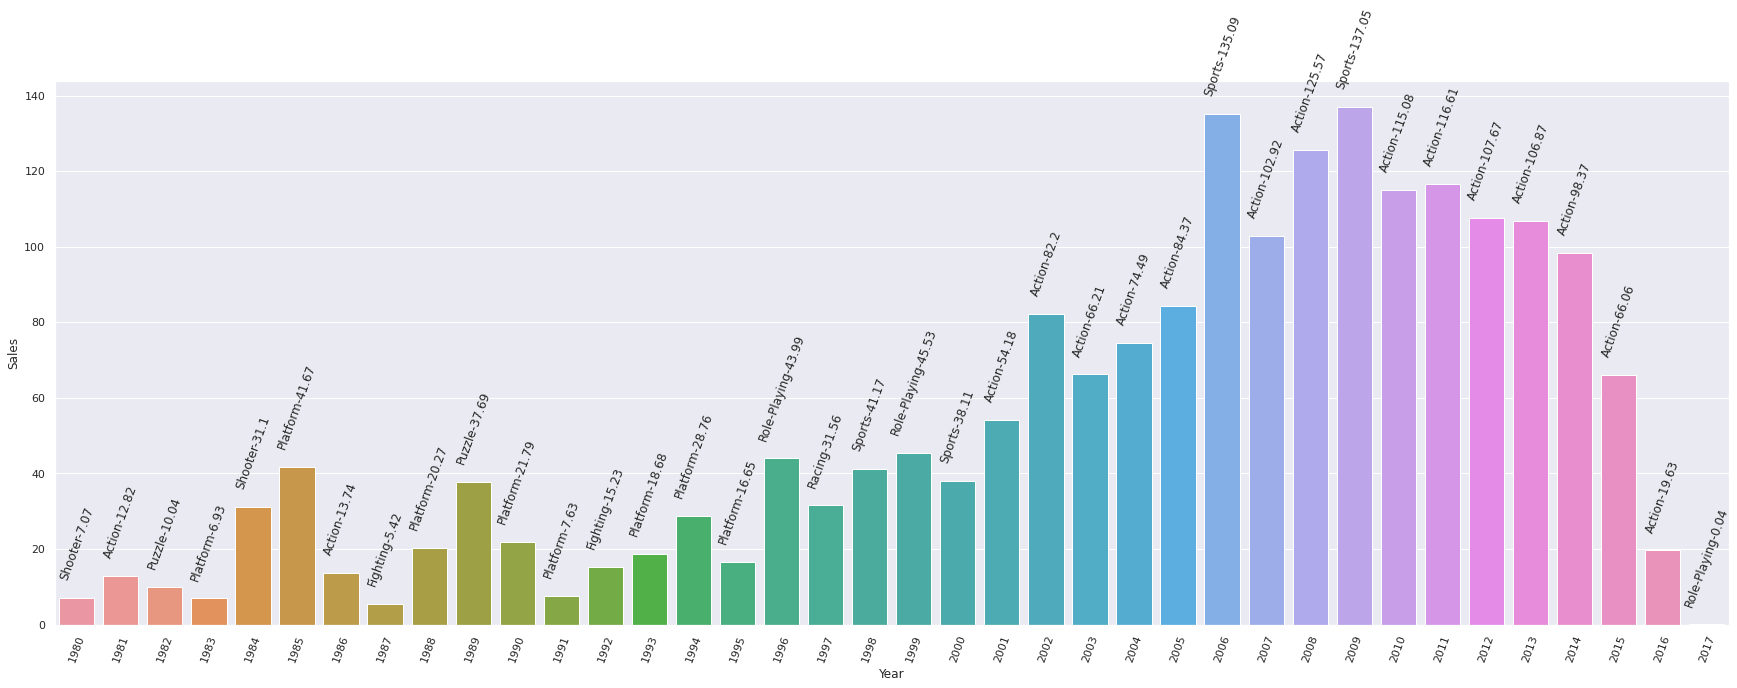

In [ ]:
#표 작성
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Year', y='Sales', data=year_max)
ge = 0
for i in year_max['Sales']:
  ax.text(x=ge, y=i+5, s=str(genre[ge] + '-' + str(round(i,2))), rotation=70, ha='center')
  ge += 1
plt.xticks(rotation=70)
plt.show()

#연도별로 게임 장르에 트렌드가 있음을 확인할 수 있다.

-플랫폼

In [ ]:
plat_n = df.groupby(['Year', 'Platform'])['Sales'].sum().reset_index(name='Sales')
plat_max_m = plat_n.groupby('Year')['Sales'].transform(max) == plat_n['Sales']
plat_max = plat_n[plat_max_m]
plat_max = plat_max.drop_duplicates(subset=['Year','Sales'])
plat_max.columns = ['Year', 'Platform', 'Sales']
plat = plat_max['Platform'].values

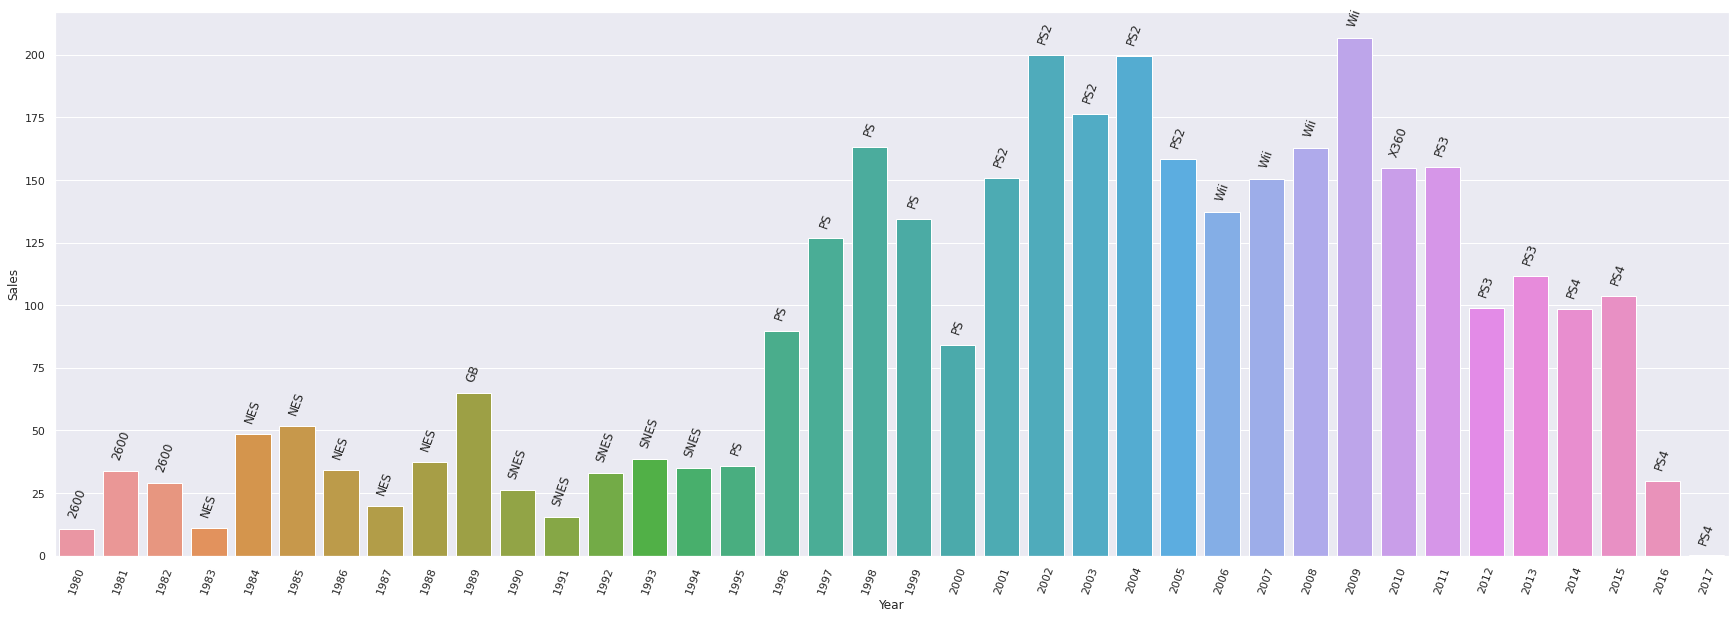

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Year', y='Sales', data=plat_max)
ge = 0
for i in plat_max['Sales']:
  ax.text(x=ge, y=i+5, s=str(plat[ge]), rotation=70, ha='center')
  ge += 1
plt.xticks(rotation=70)
plt.show()

#연도별로 플랫폼에 트렌드가 있음을 확인할 수 있다.

#3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
-역대 순위

In [ ]:
#순서 확인 및 설정
df['Ranking'] = df['Sales'].rank(ascending=False)
df = df.sort_values(by='Ranking')
top = df.head(10).copy()
top

#역대 판매량이 많은 순서로 10개의 게임을 확인할 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Ranking
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6.0
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7.0
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8.0
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9.0
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10.0


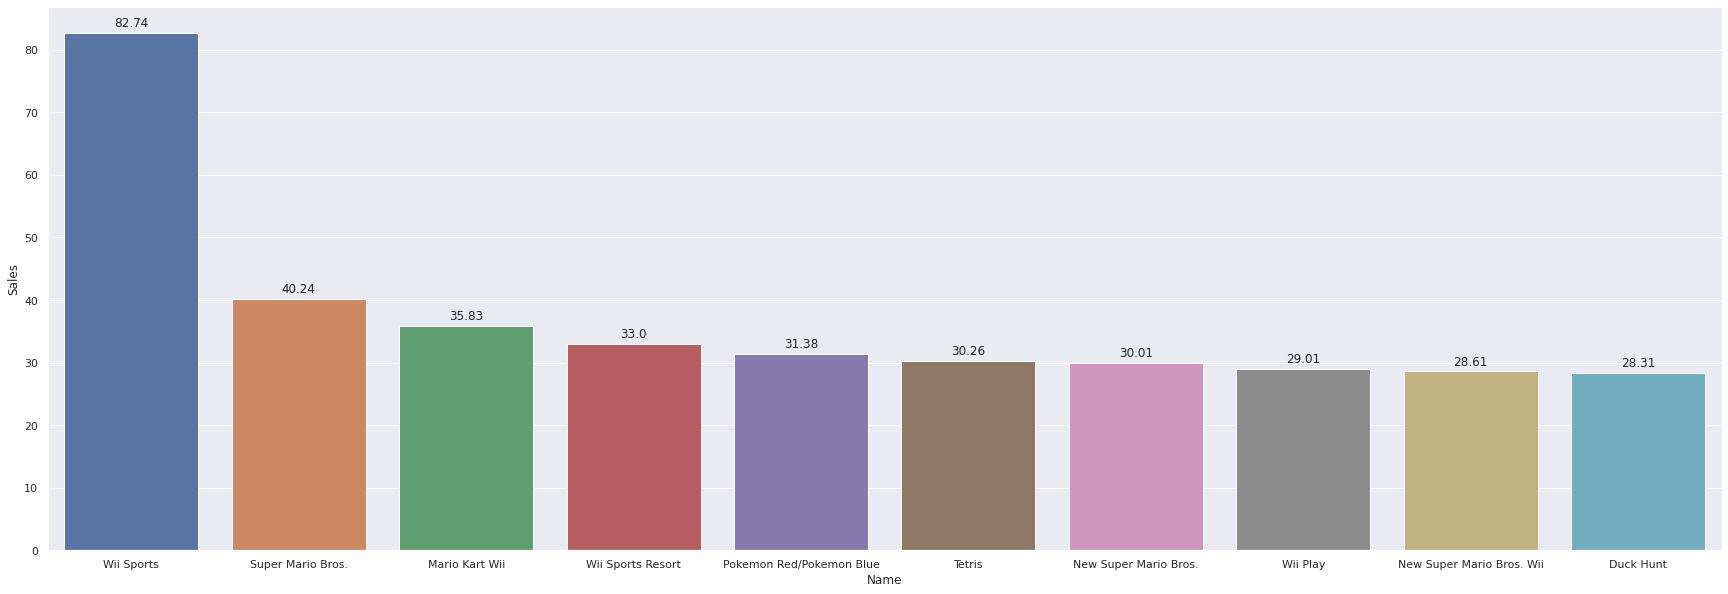

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Name', y='Sales', data=top)
ge = 0
for i in top['Sales']:
  ax.text(x=ge, y=i+1, s=str(round(i, 2)), ha='center')
  ge += 1
plt.show()

#총합 판매량을 통해 역대 1위부터 10위까지 확인할 수 있다.
#랭킹 1위부터 10위까지의 게임을 제작한 회사는 '닌텐도'회사다.
#플랫폼 중 Wii과 관련된 게임이 5개가 있다.
#마리오 시리즈가 인기를 많이 끌었음을 확인할 수 있다. (2위, 3위, 7위, 9위)

-2000년부터의 판매량 순위

In [ ]:
#조건이 2개 이상이기 때문에 sort_values로 진행
top2 = df[df.Year >= 2000].sort_values('Sales', ascending=False).head(10)
top10_2 = top2.reset_index(drop=True)
top10_2

#2000년대 판매량이 많은 순서로 10개의 게임을 확인할 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Ranking
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7.0
4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8.0
5,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9.0
6,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75,11.0
7,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43,12.0
8,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,14.0
9,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,15.0


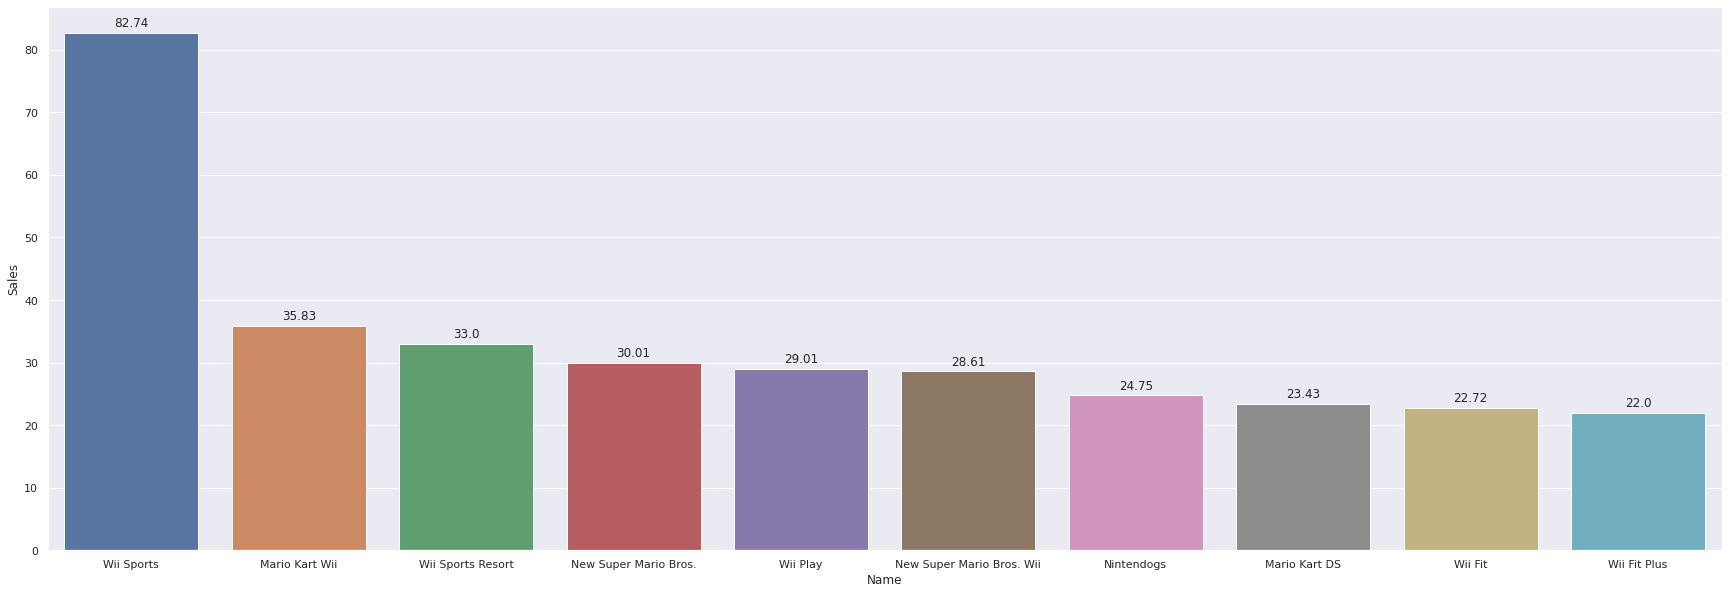

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Name', y='Sales', data=top10_2)
ge = 0
for i in top10_2['Sales']:
  ax.text(x=ge, y=i+1, s=str(round(i, 2)), ha='center')
  ge += 1
plt.show()

#닌텐도 회사의 인기가 이어짐을 확인할 수 있다.
#Wii와 DS 플랫폼만이 사용되었다.

-2010년부터의 판매량 순위

In [ ]:
top3 = df[df.Year >= 2010].sort_values('Sales', ascending=False).head(10)
top10_3 = top3.reset_index(drop=True)
top10_3

#2010년대 판매량이 많은 순서로 10개의 게임을 확인할 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Ranking
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,16.0
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,17.0
2,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,26.0
3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,29.0
4,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,30.0
5,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,31.0
6,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,32.0
7,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,33.0
8,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,35.0
9,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,38.0


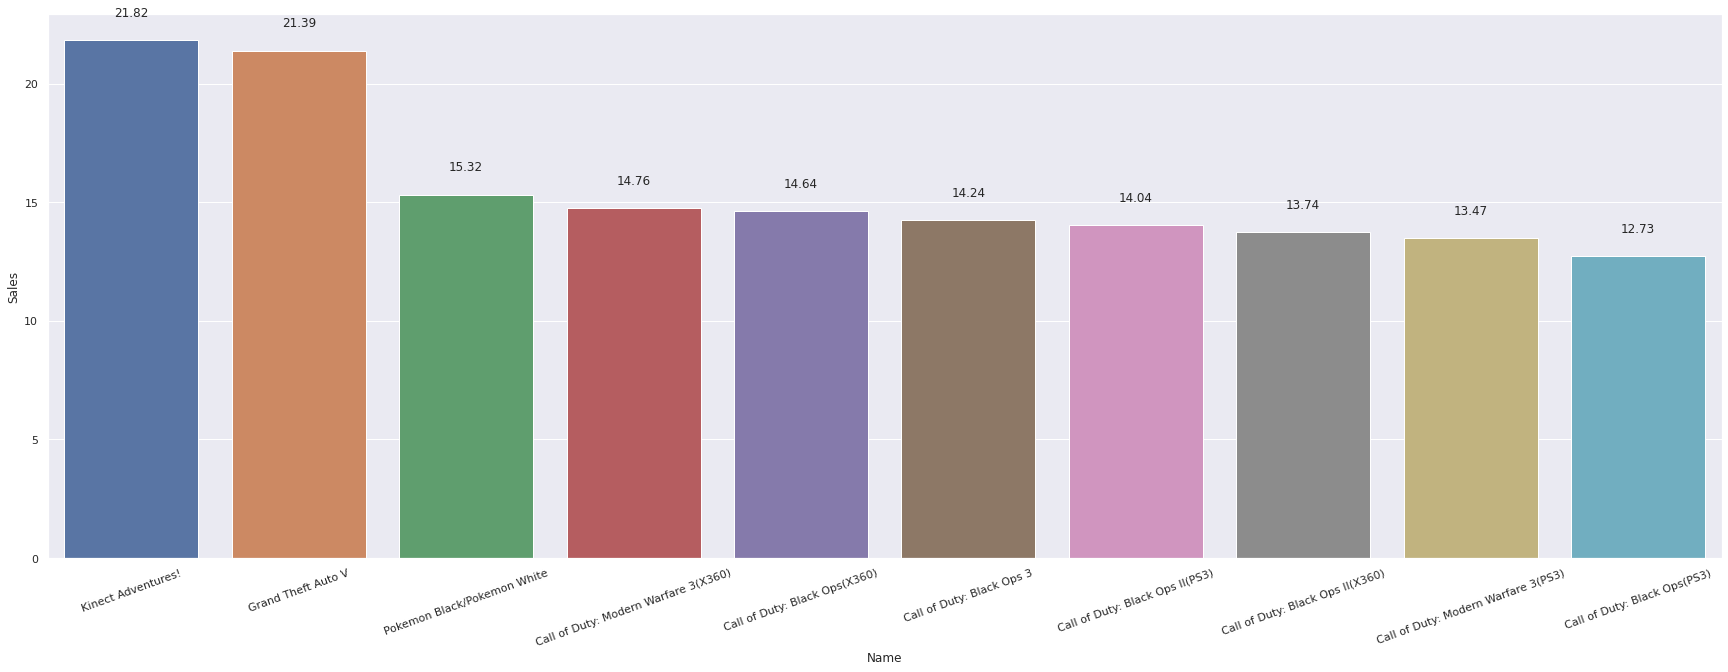

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Ranking', y='Sales', data=top10_3)
ge = 0
for i in top10_3['Sales']:
  ax.text(x=ge, y=i+1, s=str(round(i, 2)), ha='center')
  ge += 1
ax.set_xticklabels(['Kinect Adventures!','Grand Theft Auto V','Pokemon Black/Pokemon White', 'Call of Duty: Modern Warfare 3(X360)', 'Call of Duty: Black Ops(X360)','Call of Duty: Black Ops 3', 'Call of Duty: Black Ops II(PS3)', 'Call of Duty: Black Ops II(X360)', 'Call of Duty: Modern Warfare 3(PS3)', 'Call of Duty: Black Ops(PS3)'], rotation=20)
ax.set_xlabel('Name')
plt.show()

#비교적 최근인 2010년부터 순위를 넣는다면 4개의 회사의 게임이 인기를 차지했다.
#기존 닌텐도 회사의 게임이 순위를 전부 차지하였으나 10년도에 순위를 많이 차지한 회사는 액티비전 회사이다.
#이 기간에 콜 오브 듀티의 시리즈가 인기를 많이 끌었음을 확인할 수 있다.(2010년부터의 순위에서 4위부터 10위를 차지했다.)

-역대 1위 판매 게임과 2010년 1위 판매 게임과의 비교

In [ ]:
wii = df[df['Name']=='Wii Sports']
kinect = df[df['Name']=='Kinect Adventures!']
wii = pd.DataFrame(wii)
kinect = pd.DataFrame(kinect)

pd.concat([wii, kinect])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Ranking
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
4344,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,16.0


In [ ]:
w = [41.49, 29.02, 3.77, 8.46]
k = [14.97, 4.94, 0.24, 1.67]

In [ ]:
#대응 표본 t-검정(평균)
#귀무가설 : 역대 1위 판매 게임과 2010년 1위 판매 게임과의 평균의 차이가 없다.
#대립가설 : 역대 1위 판매 게임과 2010년 1위 판매 게임과의 평균의 차이가 있다.
statistic, pvalue= stats.ttest_rel(w, k)
print(pvalue)

if pvalue <0.05:
    print("대립가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 평균의 차이가 있을 것이다.")
else:
    print("귀무가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 평균의 차이가 없을 것이다.")


0.08084921529476571
귀무가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 평균의 차이가 없을 것이다.


In [ ]:
#카이제곱 검정(분산)
#귀무가설 : 역대 1위 판매 게임과 2010년 1위 판매 게임과의 분산 차이가 없다.(분산이 작다 = 데이터가 정밀하다)
#대립가설 : 역대 1위 판매 게임과 2010년 1위 판매 게임과의 분산 차이가 있다.(분산이 크다 = 데이터가 정밀하지 않다)

from scipy.stats import chisquare

st, p = chisquare(w, k)
print(p)

if p <0.05:
    print("대립가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 분산 차이가 있을 것이다.")
else:
    print("귀무가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 분산 차이가 없을 것이다.")

1.3739112738869202e-52
대립가설 채택하여 역대 1위 판매 게임과 2010년 1위 판매 게임과의 분산 차이가 있을 것이다.


#다음 분기에 어떤 게임을 설계해야 할까?
기존 지역에 따라 선호하는 게임 장르가 있을지, 연도별 게임의 트렌드가 있을지, 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 있을지 확인하였다.


결과. 기존 지역에 따른 게임 선호 장르가 있었다. 북미, 유럽, 기타 지역에서는 1등이 액션, 2등 스포츠, 3등 슈팅게임으로 인기가 있었으나 일본지역에서는 1등 롤플레잉으로 나온 것을 확인할 수 있다. 연도별 게임 트렌드의 경우 장르와 플랫폼으로 확인해본 결과 둘 다 트렌드가 존재하였으며 장르의 경우 2001년부터 2016년까지 액션이 높은 비중을 차지, 플랫폼의 경우 PS4가 최신까지 진행되었다. 마지막으로 출고량이 높은 게임에 대한 분석의 경우 역대의 경우는 닌텐도 회사의 비중과 마리오 시리즈가 많이 선호된 것을 확인할 수 있었다. 2010년대의 출고량 분석의 경우 액티비전 회사의 비중이 높았으며 콜 오브 듀티의 시리즈가 많이 선호된 것을 확인할 수 있었다.


다음 분기에 설계해야할 게임은 PS4 다음으로 유행할 플랫폼이 출시되지 않은 상황과 데이터 연도의 1년 뒤인 2018년도로 가정해서 예측하도록 하겠다.
액션 장르의 게임을 제작하여 북미, 유럽, 기타 지역에서 안정적으로 수익을 낼 수 있을 것으로 예상된다. 이는 2000년도부터 2016년까지 오랜 유행을 차지한 액션 장르와 그 수요가 많은 3가지 지역에서 판매한다면 안정적으로 수익이 창출 가능할 것으로 확인이 된다.
만약 도전적인 성향으로 수익을 내고자 한다면 2017년에 유행을 탄 롤 플레잉으로 일본에서 수익창출을 고려해봐도 좋을 것으로 추천해보고자 한다. 롤 플레잉 자체의 유행이 시작한 시점에서 롤 플레잉 장르의 수요가 많은 일본 시장을 공략하여 진행한다면 불안정적이지만 수익 창출이 이루어질 수 있을 것으로 보인다.